In [1]:
import random
import os
import matplotlib.pylab as plt
from glob import glob
import numpy as np
import webcolors
from PIL import Image
import cv2
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 15, 30

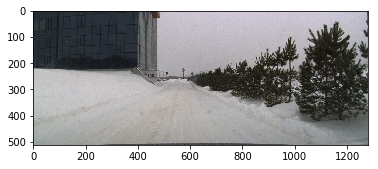

In [2]:
name = '2018-12-10-102'
# name = '2018-12-10-4'
# name = '2018-11-30-85'
# name = '2018-12-04-123'

path = '/home/kenny/Desktop/lanes-segmentation/data/images/innopolis/' + name + '.png'

#[...,::-1]
img = cv2.imread(path)[...,::-1]
plt.imshow(img, cmap='gray')

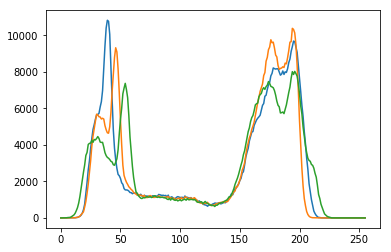

In [11]:
for i in range(3):
    hist = cv2.calcHist([img], [i], mask = None, histSize = [256], ranges = [0,256])
    plt.plot(hist)

In [12]:
hist.shape

(256, 1)

In [ ]:
def vis(aug, image=image):
    augmented = aug(image=image)

    image_augmented = augmented['image']

    f, ax = plt.subplots(2, 1, figsize=(15, 15))

    ax[0].imshow(image)
    ax[1].imshow(image_augmented)

In [ ]:
from albumentations import (
    OneOf,
    Blur,
    RandomGamma,
    HueSaturationValue,
    RGBShift,
    RandomBrightness,
    RandomContrast,
    MedianBlur,
    CLAHE
)

In [ ]:
# BLUR
aug = Blur(blur_limit=5, p=1.)
vis(aug)

In [ ]:
# Random Gamma
aug = RandomGamma(gamma_limit=(50, 150), p=1.)
vis(aug)

In [ ]:
# HSV SHIFT (prob 0.25)
aug = HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1.)
vis(aug)

In [ ]:
# RGB SHIFT
aug = RGBShift(r_shift_limit=15, g_shift_limit=5, b_shift_limit=15, p=1.)
vis(aug)

In [ ]:
# Random Brightness
aug = RandomBrightness(limit=.25, p=1.)
vis(aug)

In [ ]:
# Random Contrast (prob 0.25)
aug = RandomContrast(limit=.25, p=1.)
vis(aug)

In [ ]:
# Median Blur
aug = MedianBlur(blur_limit=5, p=1.)
vis(aug)

In [ ]:
# Contrast Limited Adaptive Histogram Equalization
aug = CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1.)
vis(aug)